## Student Perfomance Indicator

# Life Cycle of a ML Project

- Understanding the problem statement
- Data collection
- Data checks
- EDA
- Data preprocessing
- Model training
- Choose best model 

# 1) Problem statement
 This project understands how the student's perfomance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and test preparation course.

# 2) Data Collection
Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
Metadata: 8 columns and 1000 rows

# 2.1) Importing Data and required packages

In [1]:
print("hello")

hello


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the data as pandas df

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


In [3]:
df = df.drop(columns=["average_score", "total_score"])
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Renaming columns with unconventional names

In [4]:
df = df.rename(columns ={'race/ethnicity':'race_ethnicity','parental level of education':'parental_level_of_education','test preparation course':'test_preparation_course','math score':'math_score','reading score':'reading_score','writing score':'writing_score'})
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Overriding the file with new column names

In [4]:
df.to_csv('StudentsPerformance.csv',index=False)


In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Check number of Rows and Columns

In [10]:
df.shape

(1000, 8)

# 2.2 Metadata
- Gender (m/f)
- Race (group A-E)
- Parental level of education (bachelor's degree/some college/master's degree/associate's degree/high school)
- lunch (standard/(free//reduced))
- test preparation course (complete/complete before test)
- math score (0-100)
- reading score (0-100)
- writing score (0-100)


# 3. Data Checks required
- Missing values
- Duplicates
- Data types
- Unique values in each column
- Statistics
- Categories

# 3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values

# 3.2 Check Duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

There are no Duplicates

# 3.3 Check data types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are int64(3), object(5)

# 3.4 Check number of unique values in each column

In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# 3.5 Check Statistics  of the data set (only int dtypes)

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# 3.6 Data exploration

In [17]:
print("Categories in the gender variable:  ",end = " ")
print(df['gender'].unique())

print("Categories in the race or ethnicity variable:  ",end = " ")
print(df['race/ethnicity'].unique())

print("Categories in the parental level of education variable:  ",end = " ")
print(df['parental level of education'].unique())

print("Categories in the lunch variable:  ",end = " ")
print(df['lunch'].unique()) 

print("Categories in the test preparation course variable:  ",end = " ")
print(df['test preparation course'].unique())



Categories in the gender variable:   ['female' 'male']
Categories in the race or ethnicity variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in the parental level of education variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in the lunch variable:   ['standard' 'free/reduced']
Categories in the test preparation course variable:   ['none' 'completed']


In [9]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

#print columns
print("We have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# 3.8 Adding columns for total_score and average_score
- This is feature engineering

In [6]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = round(df['total_score'] / 3)  #average score of each student
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,82.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.0
4,male,group C,some college,standard,none,76,78,75,229,76.0


# Now lets do some more analysis

In [7]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()  
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in math: {math_full}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [15]:
reading_less_20 = df[df['reading_score'] <= 20].shape[0]  # Number of rows
writing_less_20 = df[df['writing_score'] <= 20].shape[0]
math_less_20 = df[df['math_score'] <= 20].shape[0]

print(f"Number of students with less than 20 marks in reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in math: {math_less_20}")


Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


We have seen best and worst perfomance subjects

## 4. Data visualization

# 4.1 Visualize average score distribution to make conclusion
- Histogram
- Kernel distribution function / Kernel density estimation (KDE)

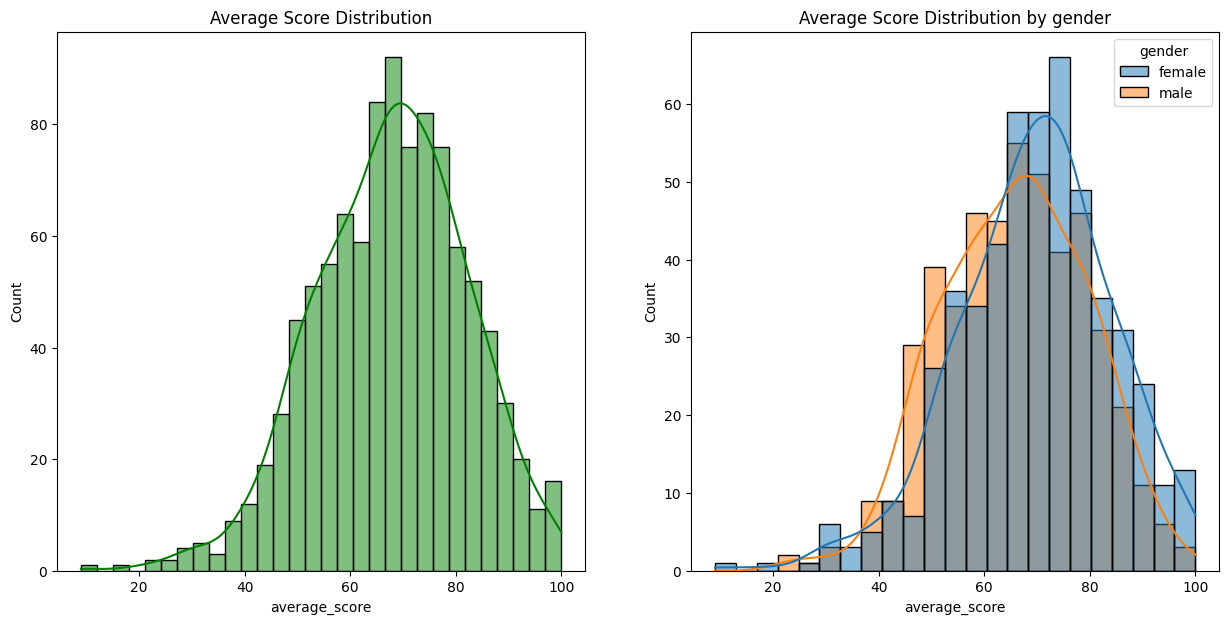

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(df['average_score'], kde = True, color = 'g', bins = 30)
plt.title('Average Score Distribution') 
plt.subplot(122)
sns.histplot(data=df, x='average_score', hue='gender', kde=True)
plt.title('Average Score Distribution by gender')
plt.show()  


# Insights
- Female students tend to perform well than male students

Text(0.5, 1.0, 'Writing Score vs Test preparation cousre and Lunch')

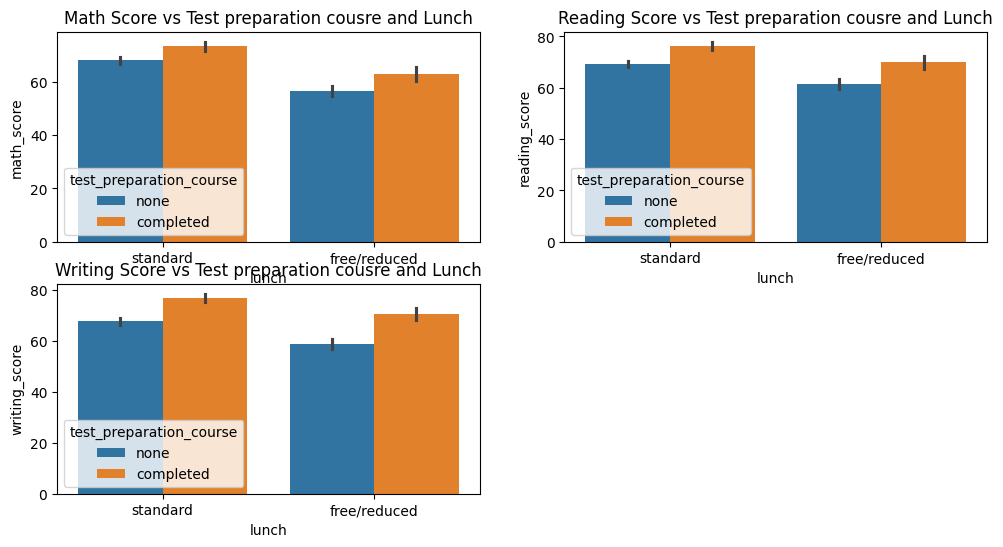

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'], y=df['math_score'],hue=df['test_preparation_course'])
plt.title('Math Score vs Test preparation cousre and Lunch')
plt.subplot(2,2,2)  
sns.barplot(x=df['lunch'], y=df['reading_score'],hue=df['test_preparation_course'])
plt.title('Reading Score vs Test preparation cousre and Lunch') 
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'], y=df['writing_score'],hue=df['test_preparation_course']) 
plt.title('Writing Score vs Test preparation cousre and Lunch')

# Insights
- Student who have completed test preparation course and have standard lunch tend to perform better than those who havent and have free/reduced lunch

# 4.4 Lets check outliers